In [0]:
# 畳み込みニューラルネットワークを利用した画像認識
# K04-6_CIFAR-10の画像分類

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
import os

In [0]:
# CIFAR-10データの読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()      # ネット接続時は1行で読み込みできる

In [101]:
# 入力画像を変換
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)    # Keras入力形式に変換 
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32') / 255     # 各画素を0から1に正規化
X_test = X_test.astype('float32') /255

# 出力形式をワンホット表現に変換 (ex.6 ⇒ [0,0,0,0,0,0,1,0,0,0] )
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# データの形状、数量を出力
print('X_train shape:', X_train.shape)      # X_trainの配列形状
print('Y_train shape:', Y_train.shape)      # Y_trainの配列形状
print(X_train.shape[0], 'train samples')    # 訓練サンプル数
print(X_test.shape[0], 'test samples')      # 評価サンプル数

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 10)
50000 train samples
10000 test samples


In [0]:
num_class = 10    #分類するクラス。CIFAR-10が10クラス分類のため

[model] Conv2D - Relu - Conv2D - Relu - Dropout - MaxPooling - Conv2d - relu -MaxPooling-Flatten-Dense - relu - Dense

In [103]:
# モデルの作成
model = Sequential()

# keras.layers.convolutional.Conv2D(filters, kernel_size, strides=1, padding="valid")

model.add(Conv2D(32, kernel_size=3, padding="same", activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=3, padding="valid", activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, padding="same", activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=3, padding="same", activation='relu'))
model.add(Conv2D(64, kernel_size=3, padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())    #Flatten()により特徴マップをベクトルに変換し、後続の全結合層と繋げられるようにする
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_class, activation='softmax'))    #Softmax関数にて、10クラスの確率として出力

model.summary()        # モデル情報の表示

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [0]:
batch_size = 512         # バッチサイズ
nb_epoch = 50            # 繰り返し回数
model_dir = "/checkpoint"

In [105]:
# 学習パラメータの設定
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

# save model
cp_callback = ModelCheckpoint("{epoch}"+"checkpoint.h5")

# モデルの学習
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    validation_data=(X_test, Y_test), callbacks = [cp_callback])

# 学習結果の評価
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 117us/step - loss: 2.1058 - acc: 0.1878 - val_loss: 1.8078 - val_acc: 0.3065
Epoch 2/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.7480 - acc: 0.3391 - val_loss: 1.5241 - val_acc: 0.4393
Epoch 3/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.5161 - acc: 0.4442 - val_loss: 1.3239 - val_acc: 0.5157
Epoch 4/50
50000/50000 [==============================] - 4s 90us/step - loss: 1.3752 - acc: 0.5058 - val_loss: 1.2081 - val_acc: 0.5686
Epoch 5/50
50000/50000 [==============================] - 4s 87us/step - loss: 1.2659 - acc: 0.5485 - val_loss: 1.1368 - val_acc: 0.5961
Epoch 6/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.1794 - acc: 0.5836 - val_loss: 1.0365 - val_acc: 0.6321
Epoch 7/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.1252 - acc: 0.6016 - val_loss: 1.0059 - val_ac

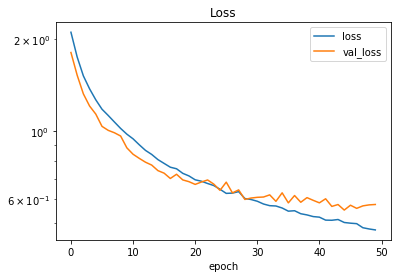

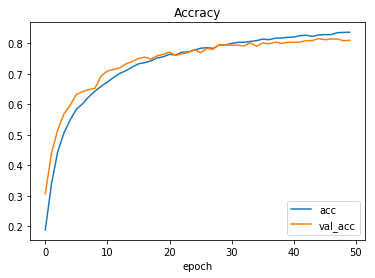

In [106]:
# 学習誤差グラフ
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.title('Loss')
plt.legend()
plt.xlabel('epoch')
plt.yscale('log')
plt.show()

# 学習精度グラフ
plt.plot(history.history['acc'], label="acc")
plt.plot(history.history['val_acc'], label="val_acc")
plt.title('Accracy')
plt.legend(loc="lower right")
plt.xlabel('epoch')
plt.show()

In [0]:
from google.colab import files

# モデルの保存と読み込み
model.save("cifar10_model.h5")
model.save_weights("cifar10_weights_model.h5")

# ローカルファイルにダウンロード
files.download( "/content/cifar10_model.h5" ) 
files.download( "/content/cifar10_weights_model.h5" ) 

# モデルの読み込み
from keras.models import load_model
model = load_model("cifar10_model.h5")

In [0]:
# CIFAR10のラベルのnumpyアレイを作成
cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])

In [0]:
check_image_index = 46

In [138]:
# 一番出力層の中のmax値
print("max value at output layer:", max(model.predict(X_test)[check_image_index]))

# 一番出力層の値が大きいIndex
class_number = model.predict_classes(X_test)[check_image_index]
print("Index of largest value:", class_number)

print('class:', cifar10_labels[class_number])

max value at output layer: 0.66863817
Index of largest value: 3
class: cat


[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


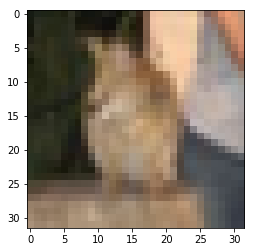

In [139]:
# X_testの100番目の画像を表示
print(y_test[check_image_index])     # 正解データ (ラベル)
print(Y_test[check_image_index])     # 正解データ (確率の配列)

# plt.imshow(X_test[200].reshape([32, 32, 3]))    # 入力画像の例を表示
plt.imshow(X_test[check_image_index].reshape([32,32,3]))

upload用のダイアログを利用して、ファイルをアップロードして読み込む

In [145]:
# データセット以外の画像使ってモデルの動作を確認
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

uploaded_fileName = next(iter(uploaded))
print(uploaded_fileName)
display_png(Image(uploaded_fileName))

Output hidden; open in https://colab.research.google.com to view.

In [147]:
for fn in uploaded.keys():
  # アップロードした画像をモデルを使って判定する
  print(fn)
  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict_classes(images)
  print(cifar10_labels[classes])

deer4.png
['horse']
